In [2]:
zip_path = "/content/leaf_pest_20.zip"


In [3]:
import zipfile
import os

zip_path = "/content/leaf_pest_20.zip"
extract_path = "/content/leaf_pest_20"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipped to:", extract_path)


✅ Unzipped to: /content/leaf_pest_20


In [4]:
!ls -R /content/leaf_pest_20 | head -50


/content/leaf_pest_20:
class_mapping_top20.csv
data.yaml
images
labels

/content/leaf_pest_20/images:
train
val

/content/leaf_pest_20/images/train:
img_12649.jpg
img_12650.jpg
img_12651.jpg
img_12652.jpg
img_12653.jpg
img_12654.jpg
img_12655.jpg
img_12656.jpg
img_12657.jpg
img_12658.jpg
img_12659.jpg
img_12660.jpg
img_12661.jpg
img_12662.jpg
img_12663.jpg
img_12664.jpg
img_12665.jpg
img_12666.jpg
img_12667.jpg
img_12668.jpg
img_12669.jpg
img_12670.jpg
img_12671.jpg
img_12672.jpg
img_12673.jpg
img_12674.jpg
img_12675.jpg
img_12676.jpg
img_12677.jpg
img_16651.jpg
img_16652.jpg
img_16653.jpg
img_16654.jpg
img_16655.jpg
img_16656.jpg
img_16657.jpg
img_16658.jpg
img_16659.jpg
img_16660.jpg


In [5]:
!pip install ultralytics --quiet
from ultralytics import YOLO


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
yaml_text = """path: /content/leaf_pest_20
train: images/train
val: images/val

names:
- Prenolepis imparis
- Pyrrhocoris apterus
- Linepithema humile
- Oncopeltus fasciatus
- Marpesia petreus
- Vespula germanica
- Magicicada septendecim
- Plecia nearctica
- Oxythyrea funesta
- Bombus rufocinctus
- Rhagonycha fulva
- Boisea trivittata
- Orthemis ferruginea
- Enallagma cyathigerum
- Coenagrion puella
- Autographa gamma
- Xylocopa virginica
- Romalea microptera
- Vespula vulgaris
- Hetaerina americana
"""

with open("/content/leaf_pest_20/data.yaml", "w") as f:
    f.write(yaml_text)

!cat /content/leaf_pest_20/data.yaml


path: /content/leaf_pest_20
train: images/train
val: images/val

names:
- Prenolepis imparis
- Pyrrhocoris apterus
- Linepithema humile
- Oncopeltus fasciatus
- Marpesia petreus
- Vespula germanica
- Magicicada septendecim
- Plecia nearctica
- Oxythyrea funesta
- Bombus rufocinctus
- Rhagonycha fulva
- Boisea trivittata
- Orthemis ferruginea
- Enallagma cyathigerum
- Coenagrion puella
- Autographa gamma
- Xylocopa virginica
- Romalea microptera
- Vespula vulgaris
- Hetaerina americana


In [8]:
model = YOLO("yolov8n.pt")  # base model

model.train(
    data="/content/leaf_pest_20/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    project="/content/yolo_leaf_train",
    name="exp_leaf_pest"
)


Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/leaf_pest_20/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp_leaf_pest2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e24ac1ac110>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043

In [11]:
from ultralytics import YOLO
model = YOLO('/content/yolo_leaf_train/exp_leaf_pest2/weights/best.pt')
model.val(split='train')  # evaluate on training set


Ultralytics 8.3.226 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,009,548 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 993.5±348.0 MB/s, size: 20.0 KB)
val: Scanning /content/leaf_pest_20/labels/train.cache... 574 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 574/574 1.4Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 36/36 6.9it/s 5.2s
                   all        574        898      0.971      0.932      0.966      0.884
    Prenolepis imparis         27         66          1      0.937      0.966      0.851
   Pyrrhocoris apterus         28         58      0.981      0.898      0.978      0.876
    Linepithema humile         29         57          1      0.878       0.98      0.887
  Oncopeltus fasciatus         26         44          1      0.936      0.959      0.886
      Marpesia petreus         16         51  

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e23cc1e7d40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043

In [18]:
results = model.predict(
    source="/content/leaf_pest_20/images/train",
    conf=0.4,
    imgsz=640,
    save=True
)



image 1/574 /content/leaf_pest_20/images/train/img_12649.jpg: 480x640 2 Enallagma cyathigerums, 252.9ms
image 2/574 /content/leaf_pest_20/images/train/img_12650.jpg: 480x640 1 Enallagma cyathigerum, 33.6ms
image 3/574 /content/leaf_pest_20/images/train/img_12651.jpg: 480x640 1 Enallagma cyathigerum, 24.1ms
image 4/574 /content/leaf_pest_20/images/train/img_12652.jpg: 480x640 1 Enallagma cyathigerum, 12.2ms
image 5/574 /content/leaf_pest_20/images/train/img_12653.jpg: 480x640 2 Enallagma cyathigerums, 20.9ms
image 6/574 /content/leaf_pest_20/images/train/img_12654.jpg: 480x640 1 Enallagma cyathigerum, 22.5ms
image 7/574 /content/leaf_pest_20/images/train/img_12655.jpg: 480x640 1 Enallagma cyathigerum, 29.6ms
image 8/574 /content/leaf_pest_20/images/train/img_12656.jpg: 480x640 2 Enallagma cyathigerums, 25.0ms
image 9/574 /content/leaf_pest_20/images/train/img_12657.jpg: 448x640 1 Enallagma cyathigerum, 92.9ms
image 10/574 /content/leaf_pest_20/images/train/img_12658.jpg: 448x640 2 Enal

📂 Prediction folder: /content/runs/detect/predict


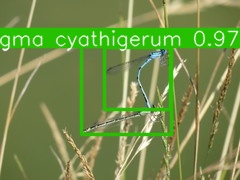

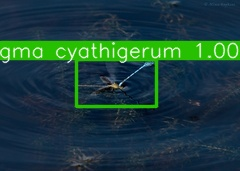

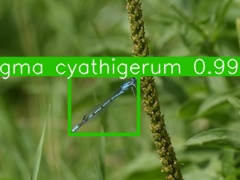

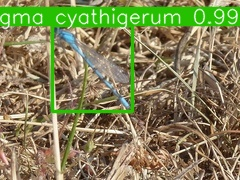

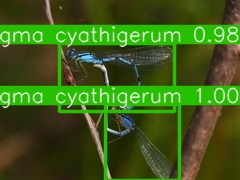

In [19]:
import glob
from IPython.display import Image, display
import os

pred_dir = sorted(glob.glob("/content/runs/detect/predict*"))[-1]
print(" Prediction folder:", pred_dir)

for img_path in sorted(glob.glob(os.path.join(pred_dir, "*.jpg")))[:5]:
    display(Image(filename=img_path))


In [24]:
results = model.predict(
    source="/content/romalea micropetro.jpg",
    conf=0.4,
    imgsz=640,
    save=True
)



image 1/1 /content/romalea micropetro.jpg: 448x640 1 Romalea microptera, 7.1ms
Speed: 3.3ms preprocess, 7.1ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict


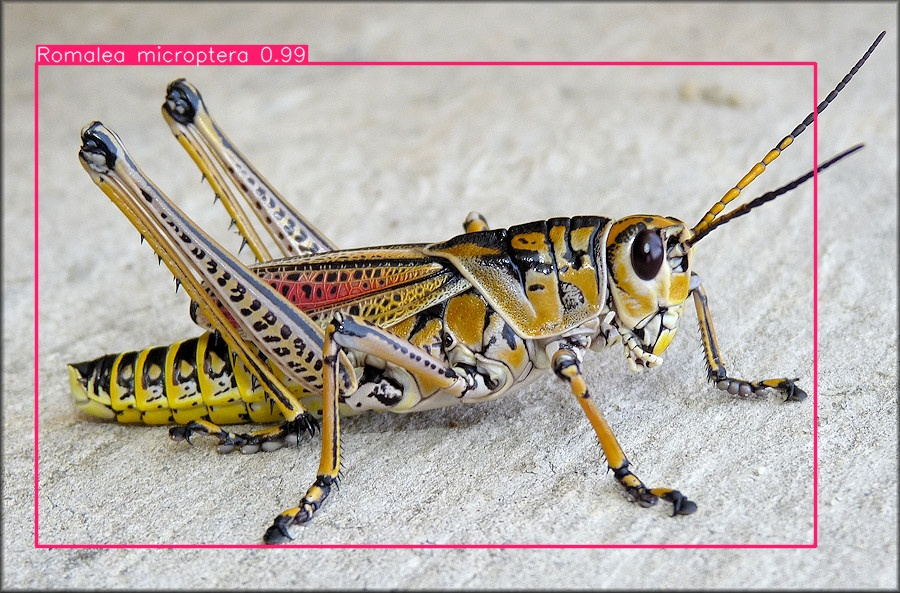

In [26]:
pred_dir = sorted(glob.glob("/content/runs/detect/predict*"))[-1]

display(Image(filename=os.path.join(pred_dir, "romalea micropetro.jpg")))


In [12]:
import shutil

# Compress your YOLO training folder
shutil.make_archive('/content/yolo_leaf_train_backup', 'zip', '/content/yolo_leaf_train')

# Compress your runs folder (includes validation/inference results)
shutil.make_archive('/content/runs_backup', 'zip', '/content/runs')

print(" Folders zipped successfully!")


✅ Folders zipped successfully!


In [13]:
!zip -r /content/best_model.zip /content/yolo_leaf_train/exp_leaf_pest/weights/best.pt
from google.colab import files
files.download('/content/best_model.zip')


	zip warning: name not matched: /content/yolo_leaf_train/exp_leaf_pest/weights/best.pt

zip error: Nothing to do! (try: zip -r /content/best_model.zip . -i /content/yolo_leaf_train/exp_leaf_pest/weights/best.pt)


FileNotFoundError: Cannot find file: /content/best_model.zip

In [14]:
!find /content -type f -name "best.pt"


/content/yolo_leaf_train/exp_leaf_pest2/weights/best.pt


In [15]:
!zip -r /content/best_model.zip /content/yolo_leaf_train/exp_leaf_pest2/weights/best.pt


  adding: content/yolo_leaf_train/exp_leaf_pest2/weights/best.pt (deflated 9%)


In [16]:
from google.colab import files
files.download('/content/best_model.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>